In [2]:
#Benchmark for ResNet50, VGG16, VGG19, Xception, Efficientnet

In [3]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ------- -------------------------------- 10.2

In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Input, Lambda, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [7]:
SIZE = 150

train_path = "C:/Users/buddh/Desktop/Models/tea_sickness_dataset/train"
test_path = "C:/Users/buddh/Desktop/Models/tea_sickness_dataset/test"

In [8]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.2,1.2],
    horizontal_flip=True,
    fill_mode='nearest')
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (SIZE, SIZE),
                                                 batch_size = 32 )


test_set = ImageDataGenerator().flow_from_directory(test_path,
                                            target_size = (SIZE, SIZE),
                                            batch_size = 32, shuffle=False )

Found 885 images belonging to 8 classes.
Found 225 images belonging to 8 classes.


In [9]:
classNo = 8

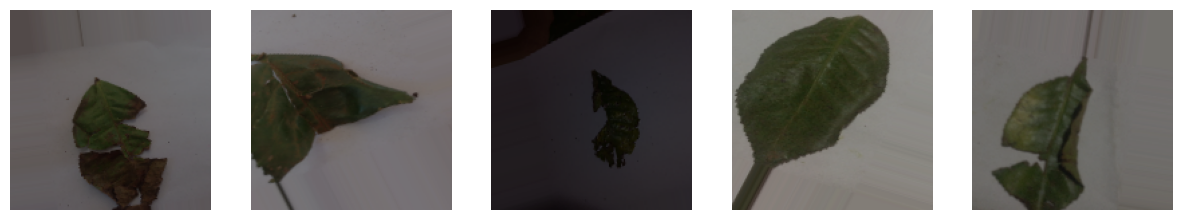

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,15))
for i in range(5):
    batch=next(train_set)   
    img=batch[0][0]  
    image = img.astype('uint8')
    image = np.squeeze(image)
    ax[i].imshow(image)
    ax[i].axis('off')

# ResNet50

In [11]:
resnet50 = tf.keras.applications.resnet50.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(SIZE,SIZE,3),
    pooling="avg",
    classes=classNo,
)



94765736/94765736 [==============================] - 137s 1us/step


In [12]:
for layer in resnet50.layers[:-4]:
    layer.trainable = False

In [13]:
resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 156, 156, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 75, 75, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 75, 75, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                       

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 38, 38, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 38, 38, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 38, 38, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 19, 19, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 19, 19, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 19, 19, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 10, 10, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 10, 10, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 10, 10, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 10, 10, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 10, 10, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 10, 10, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 10, 10, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 10, 10, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 10, 10, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 10, 10, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 5, 5, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 5, 5, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 5, 5, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 5, 5, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [14]:
resnet50_model = Sequential()
resnet50_model.add(tf.keras.layers.Lambda(
                    tf.keras.applications.resnet50.preprocess_input, 
                    input_shape=(SIZE,SIZE,3)))

resnet50_model.add(resnet50)
resnet50_model.add(Flatten())
resnet50_model.add(Dense(256, activation='relu'))
resnet50_model.add(Dense(classNo, activation='softmax',name='output') )

In [15]:
resnet50_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor = 'val_accuracy', patience = 20, verbose = 1)
mc_resnet50 =  ModelCheckpoint('benchmarking_best_resnet50_3.h5', monitor='val_accuracy', verbose=1, save_best_only=True)

In [17]:
Resnet50 = resnet50_model.fit(
    train_set,
    validation_data=test_set,
    epochs=15,
    callbacks = [es, mc_resnet50]
)

Epoch 1/15


28/28 [==============================] - ETA: 0s - loss: 1.3044 - accuracy: 0.5412
Epoch 1: val_accuracy improved from -inf to 0.69778, saving model to benchmarking_best_resnet50_3.h5


C:\Users\buddh\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


28/28 [==============================] - 89s 3s/step - loss: 1.3044 - accuracy: 0.5412 - val_loss: 0.9041 - val_accuracy: 0.6978
Epoch 2/15
28/28 [==============================] - ETA: 0s - loss: 0.6226 - accuracy: 0.7684
Epoch 2: val_accuracy improved from 0.69778 to 0.80000, saving model to benchmarking_best_resnet50_3.h5
28/28 [==============================] - 97s 3s/step - loss: 0.6226 - accuracy: 0.7684 - val_loss: 0.5643 - val_accuracy: 0.8000
Epoch 3/15
28/28 [==============================] - ETA: 0s - loss: 0.6764 - accuracy: 0.7412
Epoch 3: val_accuracy did not improve from 0.80000
28/28 [==============================] - 95s 3s/step - loss: 0.6764 - accuracy: 0.7412 - val_loss: 0.5839 - val_accuracy: 0.7778
Epoch 4/15
28/28 [==============================] - ETA: 0s - loss: 0.4963 - accuracy: 0.8090
Epoch 4: val_accuracy improved from 0.80000 to 0.84889, saving model to benchmarking_best_resnet50_3.h5
28/28 [==============================] - 97s 3s/step - loss: 0.4963 - ac

In [18]:
def plot_history(model, history):
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.axis(ymin=0.4,ymax=1)
    plt.grid()
    plt.title(f'{model.name} accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.title(f'{model.name} loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

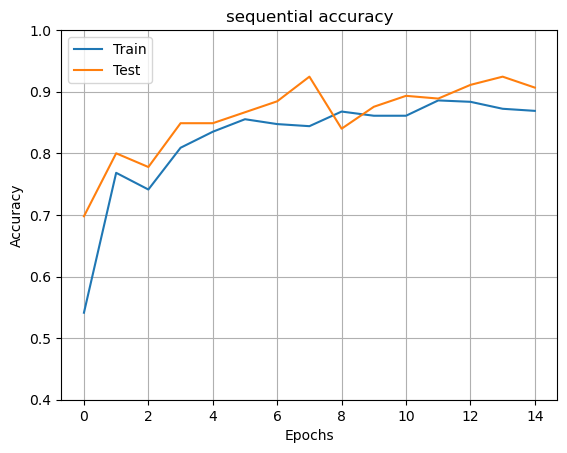

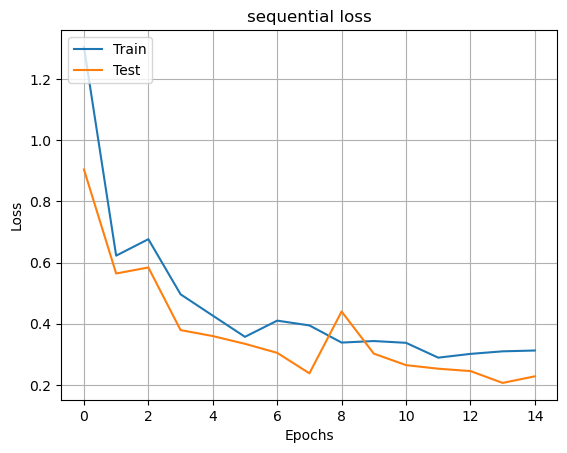

In [19]:
plot_history(resnet50_model, Resnet50)

In [20]:
train_loss, train_acc = resnet50_model.evaluate(train_set)

28/28 [==============================] - 56s 2s/step - loss: 0.2807 - accuracy: 0.8881


In [21]:
test_loss, test_acc = resnet50_model.evaluate(test_set)

8/8 [==============================] - 13s 1s/step - loss: 0.2284 - accuracy: 0.9067


In [22]:
finalPredictionForResnet = resnet50_model.predict(test_set) 

8/8 [==============================] - 14s 1s/step


In [23]:
finalClassesForResnet=np.argmax(finalPredictionForResnet,axis=1)
test_labels = test_set.classes

In [24]:
correct_predictions = np.nonzero(finalClassesForResnet == test_labels)[0]
incorrect_predictions = np.nonzero(finalClassesForResnet != test_labels)[0]

In [25]:
from sklearn.metrics import accuracy_score, classification_report

print(classification_report(test_labels, finalClassesForResnet))

              precision    recall  f1-score   support

           0       0.67      0.96      0.79        25
           1       0.88      1.00      0.93        28
           2       1.00      0.60      0.75        25
           3       0.92      0.92      0.92        25
           4       0.92      0.88      0.90        25
           5       1.00      1.00      1.00        25
           6       1.00      1.00      1.00        36
           7       0.97      0.86      0.91        36

    accuracy                           0.91       225
   macro avg       0.92      0.90      0.90       225
weighted avg       0.92      0.91      0.91       225



# Efficientnet

In [26]:
efficientnet = tf.keras.applications.efficientnet.EfficientNetB2(
    include_top=False,
    weights="imagenet",
    input_shape=(SIZE,SIZE,3),
    pooling="avg",
    classes=classNo,
)

31790344/31790344 [==============================] - 27s 1us/step


In [27]:
for layer in efficientnet.layers[:-4]:
    layer.trainable = False

In [28]:
efficientnet.summary()

Model: "efficientnetb2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 150, 150, 3)          0         ['input_2[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 150, 150, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 150, 150, 3)          0         ['normalization[0

                                                                                                  
 block2a_expand_conv (Conv2  (None, 75, 75, 96)           1536      ['block1b_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block2a_expand_bn (BatchNo  (None, 75, 75, 96)           384       ['block2a_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block2a_expand_activation   (None, 75, 75, 96)           0         ['block2a_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block2a_d

 block2c_expand_conv (Conv2  (None, 38, 38, 144)          3456      ['block2b_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block2c_expand_bn (BatchNo  (None, 38, 38, 144)          576       ['block2c_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block2c_expand_activation   (None, 38, 38, 144)          0         ['block2c_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block2c_dwconv (DepthwiseC  (None, 38, 38, 144)          1296      ['block2c_expand_activation[0]
 onv2D)   

 D)                                                                                               
                                                                                                  
 block3b_expand_bn (BatchNo  (None, 19, 19, 288)          1152      ['block3b_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block3b_expand_activation   (None, 19, 19, 288)          0         ['block3b_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block3b_dwconv (DepthwiseC  (None, 19, 19, 288)          7200      ['block3b_expand_activation[0]
 onv2D)                                                             [0]']                         
          

 block4a_expand_conv (Conv2  (None, 19, 19, 288)          13824     ['block3c_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block4a_expand_bn (BatchNo  (None, 19, 19, 288)          1152      ['block4a_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block4a_expand_activation   (None, 19, 19, 288)          0         ['block4a_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block4a_dwconv_pad (ZeroPa  (None, 21, 21, 288)          0         ['block4a_expand_activation[0]
 dding2D) 

 D)                                                                                               
                                                                                                  
 block4c_expand_bn (BatchNo  (None, 10, 10, 528)          2112      ['block4c_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block4c_expand_activation   (None, 10, 10, 528)          0         ['block4c_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block4c_dwconv (DepthwiseC  (None, 10, 10, 528)          4752      ['block4c_expand_activation[0]
 onv2D)                                                             [0]']                         
          

 block5a_expand_conv (Conv2  (None, 10, 10, 528)          46464     ['block4d_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block5a_expand_bn (BatchNo  (None, 10, 10, 528)          2112      ['block5a_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block5a_expand_activation   (None, 10, 10, 528)          0         ['block5a_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block5a_dwconv (DepthwiseC  (None, 10, 10, 528)          13200     ['block5a_expand_activation[0]
 onv2D)   

 rmalization)                                                                                     
                                                                                                  
 block5c_expand_activation   (None, 10, 10, 720)          0         ['block5c_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block5c_dwconv (DepthwiseC  (None, 10, 10, 720)          18000     ['block5c_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block5c_bn (BatchNormaliza  (None, 10, 10, 720)          2880      ['block5c_dwconv[0][0]']      
 tion)                                                                                            
          

 block6a_expand_bn (BatchNo  (None, 10, 10, 720)          2880      ['block6a_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6a_expand_activation   (None, 10, 10, 720)          0         ['block6a_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block6a_dwconv_pad (ZeroPa  (None, 13, 13, 720)          0         ['block6a_expand_activation[0]
 dding2D)                                                           [0]']                         
                                                                                                  
 block6a_dwconv (DepthwiseC  (None, 5, 5, 720)            18000     ['block6a_dwconv_pad[0][0]']  
 onv2D)   

 rmalization)                                                                                     
                                                                                                  
 block6c_expand_activation   (None, 5, 5, 1248)           0         ['block6c_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block6c_dwconv (DepthwiseC  (None, 5, 5, 1248)           31200     ['block6c_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block6c_bn (BatchNormaliza  (None, 5, 5, 1248)           4992      ['block6c_dwconv[0][0]']      
 tion)                                                                                            
          

 block6e_expand_bn (BatchNo  (None, 5, 5, 1248)           4992      ['block6e_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6e_expand_activation   (None, 5, 5, 1248)           0         ['block6e_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block6e_dwconv (DepthwiseC  (None, 5, 5, 1248)           31200     ['block6e_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block6e_bn (BatchNormaliza  (None, 5, 5, 1248)           4992      ['block6e_dwconv[0][0]']      
 tion)    

 (Activation)                                                                                     
                                                                                                  
 block7b_dwconv (DepthwiseC  (None, 5, 5, 2112)           19008     ['block7b_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block7b_bn (BatchNormaliza  (None, 5, 5, 2112)           8448      ['block7b_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block7b_activation (Activa  (None, 5, 5, 2112)           0         ['block7b_bn[0][0]']          
 tion)                                                                                            
          

In [29]:
efficientnet_model = Sequential()
efficientnet_model.add(tf.keras.layers.Lambda(
                    tf.keras.applications.efficientnet.preprocess_input, 
                    input_shape=(SIZE,SIZE,3)))

efficientnet_model.add(efficientnet)
efficientnet_model.add(Flatten())
efficientnet_model.add(Dense(256, activation='relu'))
efficientnet_model.add(Dense(128, activation='relu'))
efficientnet_model.add(Dense(classNo, activation='softmax',name='output') )

efficientnet_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 150, 150, 3)       0         
                                                                 
 efficientnetb2 (Functional  (None, 1408)              7768569   
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 1408)              0         
                                                                 
 dense_1 (Dense)             (None, 256)               360704    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 output (Dense)              (None, 8)                 1032      
                                                      

In [30]:
efficientnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [31]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor = 'val_accuracy', patience = 20, verbose = 1)
mc_effnet =  ModelCheckpoint('benchmarking_best_efficientnet_3.h5', monitor='val_loss', verbose=1, save_best_only=True)

In [32]:
EfficientNet = efficientnet_model.fit(
    train_set,
    validation_data=test_set,
    epochs=15,
    callbacks = [es, mc_effnet]
)

Epoch 1/15
28/28 [==============================] - ETA: 0s - loss: 1.3722 - accuracy: 0.4927
Epoch 1: val_loss improved from inf to 0.92867, saving model to benchmarking_best_efficientnet_3.h5


C:\Users\buddh\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


28/28 [==============================] - 78s 3s/step - loss: 1.3722 - accuracy: 0.4927 - val_loss: 0.9287 - val_accuracy: 0.6267
Epoch 2/15
28/28 [==============================] - ETA: 0s - loss: 0.7424 - accuracy: 0.7153
Epoch 2: val_loss improved from 0.92867 to 0.58290, saving model to benchmarking_best_efficientnet_3.h5
28/28 [==============================] - 88s 3s/step - loss: 0.7424 - accuracy: 0.7153 - val_loss: 0.5829 - val_accuracy: 0.7778
Epoch 3/15
28/28 [==============================] - ETA: 0s - loss: 0.6596 - accuracy: 0.7379
Epoch 3: val_loss improved from 0.58290 to 0.43261, saving model to benchmarking_best_efficientnet_3.h5
28/28 [==============================] - 95s 3s/step - loss: 0.6596 - accuracy: 0.7379 - val_loss: 0.4326 - val_accuracy: 0.8444
Epoch 4/15
28/28 [==============================] - ETA: 0s - loss: 0.5304 - accuracy: 0.8102
Epoch 4: val_loss did not improve from 0.43261
28/28 [==============================] - 95s 3s/step - loss: 0.5304 - accura

In [33]:
def plot_history(model, history):
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.axis(ymin=0.4,ymax=1)
    plt.grid()
    plt.title(f'{model.name} accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.title(f'{model.name} loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

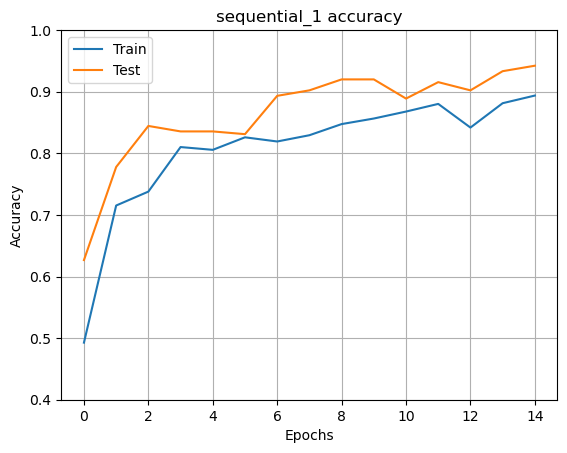

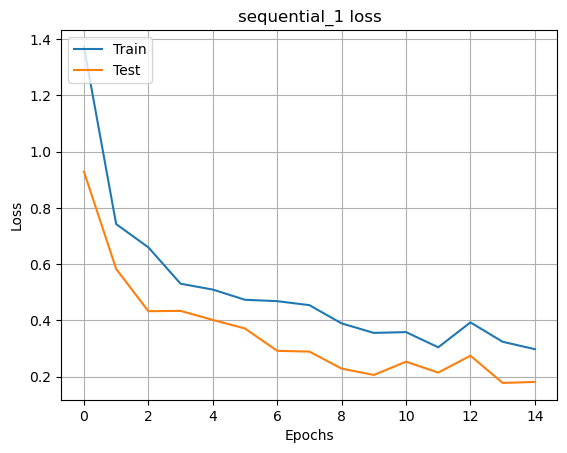

In [34]:
plot_history(efficientnet_model, EfficientNet)

In [35]:
train_loss, train_acc = efficientnet_model.evaluate(train_set)

28/28 [==============================] - 63s 2s/step - loss: 0.2580 - accuracy: 0.9051


In [36]:
test_loss, test_acc = efficientnet_model.evaluate(test_set)

8/8 [==============================] - 15s 2s/step - loss: 0.1812 - accuracy: 0.9422


In [37]:
finalPredictionForEfficientNet = efficientnet_model.predict(test_set) 

8/8 [==============================] - 17s 2s/step


In [38]:
finalClassesForEfficientNet =np.argmax(finalPredictionForEfficientNet,axis=1)
test_labels = test_set.classes

In [39]:
correct_predictions = np.nonzero(finalClassesForEfficientNet == test_labels)[0]
incorrect_predictions = np.nonzero(finalClassesForEfficientNet != test_labels)[0]

In [40]:
from sklearn.metrics import accuracy_score, classification_report

print(classification_report(test_labels, finalClassesForEfficientNet))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87        25
           1       1.00      0.93      0.96        28
           2       0.75      0.96      0.84        25
           3       0.92      0.96      0.94        25
           4       1.00      0.88      0.94        25
           5       1.00      1.00      1.00        25
           6       1.00      1.00      1.00        36
           7       0.95      0.97      0.96        36

    accuracy                           0.94       225
   macro avg       0.95      0.94      0.94       225
weighted avg       0.95      0.94      0.94       225



# Ensemble Model

In [41]:
from keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model

In [42]:
Resnet50Model = load_model('benchmarking_best_resnet50_3.h5')
EfficientNetModel = load_model('benchmarking_best_efficientnet_3.h5')

In [43]:
models = [Resnet50Model, EfficientNetModel]

In [44]:
for i in range(len(models)):
    model = models[i]
    for layer in model.layers:
        layer.trainable = False
        layer._name = 'ensemble_' + str(i+1) + '_' + layer.name

In [45]:
model_input = tf.keras.Input(shape=(SIZE, SIZE, 3)) #input shape for the ensemble model.
model_outputs = [model(model_input) for model in models]
ensemble_output = tf.keras.layers.Concatenate()(model_outputs) #concat
merge = Dense(classNo, activation='relu')(ensemble_output) #adds a fully connected layer (Dense layer) to the ensemble_output tensor.
output = Dense(classNo, activation='softmax',name='output')(merge) #adds another fully connected layer, followed by a softmax activation function.
model = Model(inputs=model_input, outputs=output)
#this code builds an ensemble model that takes an input image and passes it through multiple individual models.

In [46]:
pip install graphviz

     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     -------- ------------------------------- 10.2/47.0 kB ? eta -:--:--
     ---------------- --------------------- 20.5/47.0 kB 217.9 kB/s eta 0:00:01
     -------------------------------------- 47.0/47.0 kB 261.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [47]:
plot_model(model, to_file='model.png',show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [48]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [49]:
es = EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1)
mc_ensemble =  ModelCheckpoint('ensemble_model_using_2.h5', monitor='val_loss', verbose=1, save_best_only=True)

In [50]:
history = model.fit(
    train_set, 
    validation_data= test_set,
    epochs=20,
    callbacks = [es, mc_ensemble]
)

Epoch 1/20
28/28 [==============================] - ETA: 0s - loss: 2.1020 - accuracy: 0.1311
Epoch 1: val_loss improved from inf to 2.06558, saving model to ensemble_model_using_2.h5


C:\Users\buddh\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


28/28 [==============================] - 141s 5s/step - loss: 2.1020 - accuracy: 0.1311 - val_loss: 2.0656 - val_accuracy: 0.1867
Epoch 2/20
28/28 [==============================] - ETA: 0s - loss: 2.0064 - accuracy: 0.2520
Epoch 2: val_loss improved from 2.06558 to 1.96584, saving model to ensemble_model_using_2.h5
28/28 [==============================] - 122s 4s/step - loss: 2.0064 - accuracy: 0.2520 - val_loss: 1.9658 - val_accuracy: 0.3600
Epoch 3/20
28/28 [==============================] - ETA: 0s - loss: 1.9156 - accuracy: 0.4045
Epoch 3: val_loss improved from 1.96584 to 1.86535, saving model to ensemble_model_using_2.h5
28/28 [==============================] - 116s 4s/step - loss: 1.9156 - accuracy: 0.4045 - val_loss: 1.8653 - val_accuracy: 0.4800
Epoch 4/20
28/28 [==============================] - ETA: 0s - loss: 1.8162 - accuracy: 0.4814
Epoch 4: val_loss improved from 1.86535 to 1.76000, saving model to ensemble_model_using_2.h5
28/28 [==============================] - 115s 

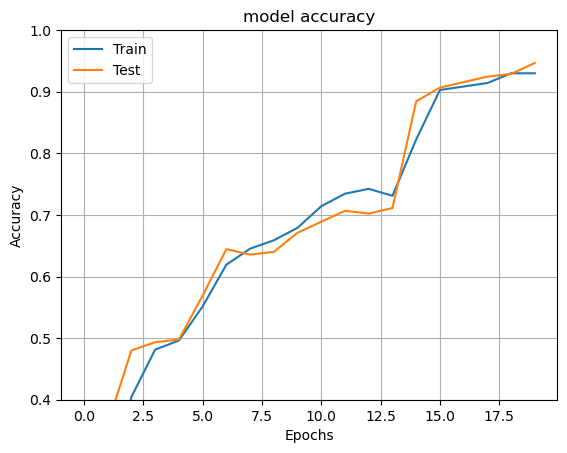

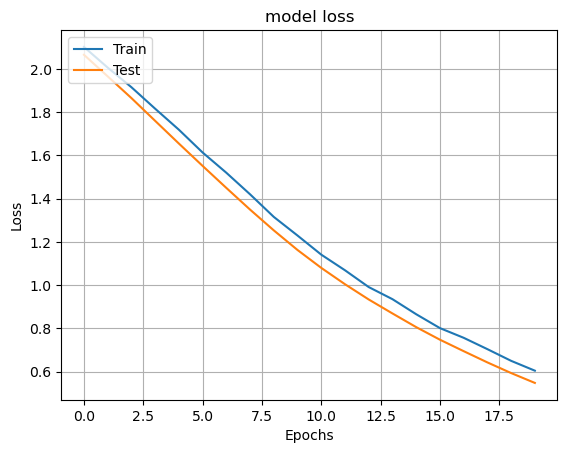

In [51]:
plot_history(model, history)

In [52]:
EnsembleModel = load_model('ensemble_model_using_2.h5')

In [53]:
train_loss, train_acc = EnsembleModel.evaluate(train_set)

28/28 [==============================] - 78s 3s/step - loss: 0.5665 - accuracy: 0.9333


In [54]:
test_loss, test_acc = EnsembleModel.evaluate(test_set)

8/8 [==============================] - 18s 2s/step - loss: 0.5475 - accuracy: 0.9467


In [55]:
finalPrediction = model.predict(test_set) 

8/8 [==============================] - 20s 2s/step


In [56]:
finalClasses=np.argmax(finalPrediction,axis=1)
test_labels = test_set.classes

# Please ensure that test_labels and finalClasses are the correct arrays containing the actual labels and predicted labels, 
# respectively

In [57]:
correct_predictions = np.nonzero(finalClasses == test_labels)[0]
incorrect_predictions = np.nonzero(finalClasses != test_labels)[0]

In [58]:
from sklearn.metrics import accuracy_score, classification_report

print(classification_report(test_labels, finalClasses))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        25
           1       1.00      1.00      1.00        28
           2       0.92      0.92      0.92        25
           3       0.95      0.80      0.87        25
           4       0.92      0.96      0.94        25
           5       1.00      0.96      0.98        25
           6       1.00      0.97      0.99        36
           7       0.86      1.00      0.92        36

    accuracy                           0.95       225
   macro avg       0.95      0.94      0.94       225
weighted avg       0.95      0.95      0.95       225



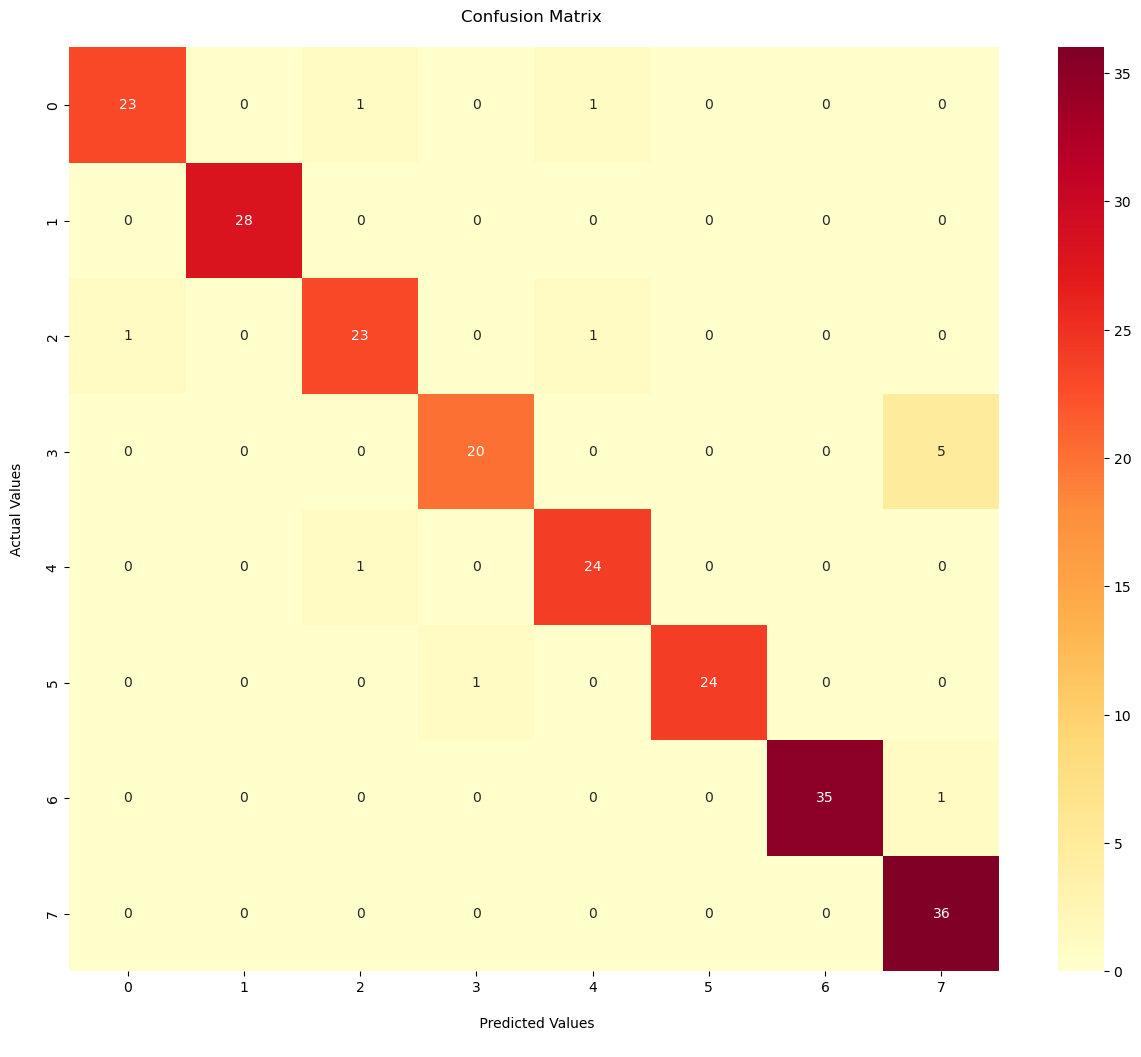

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(15,12))
fx=sns.heatmap(confusion_matrix(test_labels,finalClasses), annot=True, fmt="d",cmap="YlOrRd")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(["0","1","2","3","4","5","6","7"])
fx.yaxis.set_ticklabels(["0","1","2","3","4","5","6","7"])
plt.show()